Group Name: AG 19

Student Name (Student ID):

1. Lee Han Jian (A0248322J)

2. LI SHENGDONG (A0248417Y)

3. ZHENG WENGRUI (A0250948W)

# Question 1

Consider the maze shown below. The Maze has 16 rows and 24 columns The objective is to find a shortest path from cell $S$ to cell $G$.


![Maze](https://github.com/Hanjianlee/IT5005/blob/main/assignment1/Maze_Assignment_1.jpg?raw=1)


The agent can take four actions in each cell: 'RIGHT', 'DOWN', 'UP', 'LEFT'.  

Each cell is represented as $(x,y)$, where $x$ indicates row number and $y$ indicates column number. Action 'UP' takes the agent from cell $(x,y)$ to $(x+1,y)$. Action 'DOWN' takes the agent from cell $(x,y)$ to $(x-1,y)$. Action 'RIGHT' takes the agent from cell $(x,y)$ to $(x,y+1)$. Action 'LEFT' takes the agent from cell $(x,y)$ to $(x,y-1)$. The triplet $(s,a,s')$  indicates that taking action $a$ at state $s$ leads to state $s'$. Actions 'LEFT' or 'RIGHT' cost 10 units for all $(s,a,s')$. Actions 'UP' or 'DOWN' cost 1 unit for all  $(s,a,s')$.  The agent cannot move into cells that are shaded. Assume that the agent knows the boundaries of the maze and has full observability. Consequently, at the bottom (row 0) and top (row 15), the agent will not take actions 'DOWN' and 'UP', respectively; at left (column 0) and right (column 23) columns, the agent will not take 'LEFT' and 'RIGHT' actions, respectively. Similalry, the agent will not take actions that lead to shaded region in the maze.

## **Q1.a: Class Maze(Problem)** [3 Marks]

Write a Maze class to create a model for this problem. You should not use an explicit state space model. The modelling should inherit the abstract class 'Problem' (given below). With the problem formulation, find the shortest path from S to G cell. Propose and implement multiple heuristics (at least two heuristics) for informed search algorithms. 

## **Q1.b: Analysis of the Algorithms** [7 Marks]

1. Solve the above Maze problem using the following algorithms

    a. Breadth-First Search

    b. Depth-First Search with Cycle-Check

    c. Iterative-Deepening Search with Cycle-Check

    d. Uniform-Cost Search

    e. A* Search 

    f. Greedy Best-first Search

    g. Any other variants for search algorithms that are not discussed in the class (bonus/optional question) 

2. Identify the number of nodes generated, number of nodes expanded, maximum frontier size, and path-cost for the above algorithms. 
 
3. Compare the performance of informed search algorithms with proposed heuristics. Identify the best performing heuristic and explain.
 
4. Draw a bar plot comparing the statistics of the algorithms and explain the results. 

Note 1: You must follow the problem formulation discussed in the class. A abstract class for Problem and Node definition is presented below. The search tree generation should follow the template discussed in the class (i.e., Node class, expand methods, etc.). 

Note 2: If you are borrowing a block of code (for example, helper functions or data structures, etc.) from AIMA4e repository, you have to acknowledge it in the code. 

Note 3: The code should be written in a single jupyter notebook file.

In [2]:
class Problem:
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        raise NotImplementedError
    def result(self, state, action): raise NotImplementedError
    def is_goal(self, state):        return state == self.goal
    def action_cost(self, s, a, s1): return 1
    def h(self, node):               return 0
    
    def __str__(self):
        return '{}({!r}, {!r})'.format(
            type(self).__name__, self.initial, self.goal)

In [3]:
# Use the following Node class to generate search tree
import math
class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0, f=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost, f=f)

    def __repr__(self): return '<{}>'.format(self.state)
    def __len__(self): return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): return self.path_cost < other.path_cost 


## Q1.a Implementation of Maze class

In this part, we model the Maze problem in class 'Maze' which inherits the abstract class 'Problem'. The coordinates we use is in the form of (row number, column number).

We have implemented two different heuristics:
1. Manhattan distance heuristics with uniform cost (`h` method in the code)
2. Manhattan distance heuristics with accurate cost (`h_with_cost` method in the code)

Manhattan distance heuristics with uniform cost means that this heuristics use Manhattan distance but assumes that all actions have the same cost 1. When moving up and down, this is the accurate cost. However, when moving left and right, this heuristics will underestimate the cost.

Manhattan distance heuristics with accurate cost means that this heuristics use Manhattan distance with 1 cost of moving up and down and 10 cost of moving left and right, which is consistent with the problem setting.

Both heuristics are solution to the relexed problem of the current problem. 
- For Manhattan distance heuristics with uniform cost, the relaxed problem is a Maze problem that we remove the shaded region and agent can move left and right with lower cost 1.
- For Manhattan distance heuristics with accurate cost, the relaxed problem is a Maze problem that we remove the shaded region.

Since both heuristics are solution to the relaxed problem of the current problem, they are both consistent and admissible heuristics.

It is easy to prove that the Manhattan distance heuristics with accurate cost **dominates** the Manhattan distance heuristics with uniform cost, since for every point n, we have $h_{Manhattan\_uniform} \leq h_{Manhattan\_accurate}$

In [40]:
from collections import deque
class Maze(Problem):
    #Your code goes here (16x24 Board)  format : (r,c)
    def __init__(self):
        self.initial = (8,10) # Start
        self.goal = (11,9) # Goal 
        self.expanded_nodes = 0
        self.generated_nodes = 0
        self.max_frontier_size = 0
        #self.heuristic = 1
        #self.up_cost = self.down_cost = 1
        #self.left_cost = self.right_cost = 10
        # Shaded regions
        self.shaded_regions = set()
        self.add_shadded_region(14,9)

        #Column 1 @ column 10
        self.add_shadded_region(13,10)
        self.add_shadded_region(12,10)
        self.add_shadded_region(11,10)
        self.add_shadded_region(10,10)

        #Column 2 @ column
        self.add_shadded_region(10,9)
        self.add_shadded_region(9,9)
        self.add_shadded_region(8,9)
        self.add_shadded_region(7,9)
        self.add_shadded_region(6,9)
 
        # SquareBox
        self.add_shadded_region(11,12)
        self.add_shadded_region(10,12)
        self.add_shadded_region(11,13)
        self.add_shadded_region(10,13)

        self.check = Node(self.initial,None,None,1)
        # Print start Node State
        if self.check.state in self.shaded_regions:
            print("Bad Start! :(")

    def expand(self,node):
        state = node.state
        # number of child nodes of a node in Maze is at most 4, so we can simply use list instead of generator
        nodes = []
        for action in self.actions():
            child_state = self.result(state,action)
            # if this action is valid, i.e. the child state is not None
            if child_state is not None:
                # path_cost of the child node
                cost = node.path_cost + self.action_cost(state, action, child_state)
                nodes.append(Node(child_state, node, action, cost))
        return nodes
    
    def add_shadded_region(self,r: int,c: int):
        if not isinstance(r,int) or not isinstance(c,int):
            raise AttributeError
        return self.shaded_regions.add((r,c))
    
    def actions(self):
        return ['DOWN','RIGHT','UP','LEFT']
    
    def action_cost(self, s, action, s1):
        if (action == 'UP') or (action == 'DOWN'):
            return 1
        else:  # if action is left or right move
            return 10

    def result(self, state:tuple, action: str): 
        if  action == 'UP':
            if state[0] == 15:
                return None 
            new_state = (state[0]+1,state[1])

        elif action == 'DOWN':
            if state[0] == 0 :
                return None     
            new_state = (state[0]-1,state[1])

        elif action == 'LEFT':
            if state[1] == 0:
                return None 
            new_state = (state[0],state[1]-1)

        elif action == 'RIGHT':
            if state[1] == 23:
                return None 
            new_state =(state[0],state[1]+1)
            
        # if new_state is in the shaded region
        if new_state in self.shaded_regions:
            return None
        return new_state

    def is_cycle(self,node):
        current_node = node 
        while current_node.parent is not None:
            if node.state == current_node.parent.state:
                return True
            current_node = current_node.parent
        return False


    # Receive a final result node of a search and print the total path from initial state to goal state
    def print_path_found(self, node):
        p = node
        path_list = []
        path_list.append(p.state)
        # while p has parent
        while p.parent is not None:
            p = p.parent
            path_list.append(p.state)
        return path_list[::-1]
        
    
    # Manhattan distance heuristics with uniform cost (i.e. vertical and horizontal move have the same cost of 1)
    # Since it's solution to relaxed Maze problem(No shaded region, uniform cost), it is consistent heuristic
    def h(self, state):
        return abs(state[0] - self.goal[0]) + abs(state[1] - self.goal[1])
    
    # Manhattan distance heuristics with accurate cost
    def h_with_cost(self, state):
        return abs(state[0] - self.goal[0])*1 + abs(state[1] - self.goal[1])*10
    
    def add_generated_nodes(self):
        self.generated_nodes += 1
        
    def add_expanded_nodes(self):
        self.expanded_nodes += 1
    
    def update_max_frontier_size(self,size):
        if size > self.max_frontier_size:
            self.max_frontier_size = size



## Q1.b Analysis of Algorithms

### Implementation of different search algorithms

For implementation of different search algorithms (BFS, DFS, IDS, UCS, A* search, GBFS), we borrow code from AIMA4e repository (https://github.com/aimacode/aima-python/blob/master/search4e.ipynb). We add extra code inside the borrowed algorithm code to calculate the number of nodes generated and expanded and maximum frontier size.

For the (g) any other variants for search algorithms that are not discussed in the class, we choose to implement Recursive best first search (RBFS). For implementation of RBFS, we refer to the AIMA4e textbook's pseudocode in page 111.

In the following part, we organize the implentation of algorithms in the following order:

- (a) breadth_first_search
- (b) depth_first_search with cycle-check
- (c) iterative deepening search with cycle-check
- (d) uniform_cost_search
- (e) greedy_best_first_search
- (f) astar_search
- (f) astar_search (with different heuristic function)
- (g) Any other variants for search algorithms that are not discussed in the class (Recursive best first search, RBFS)

#### **Reference:**

Peter Norvig.(2019). Github Repository aimacode/aima-python search4e.ipynb. Retrieved 27 Sep 2022 from https://github.com/aimacode/aima-python/blob/master/search4e.ipynb

Russell, S. J., & Norvig, P. (2021). Artificial intelligence: a modern approach. 2021. Artificial intelligence: a modern approach, 4th edition.

In [66]:
import sys
# (a) breadth_first_search: 
# code borrowed from AIMA4e repository (https://github.com/aimacode/aima-python/blob/master/search4e.ipynb)
def breadth_first_search(problem):
    node = Node(problem.initial)
    if problem.is_goal(node.state):
        return node
    frontier = deque([node]) # FIFO
    reached = {problem.initial}
    count = 0
    while len(frontier):
        count += 1
        node = frontier.popleft()
        # TODO: loop through expanded nodes ~~ 
        problem.add_expanded_nodes()
        for child_node in  problem.expand(node):
            if problem.is_goal(child_node.state): 
                return child_node
            if child_node.state not in reached:
                problem.add_generated_nodes()
                reached.add(child_node.state)
                frontier.append(child_node)
                problem.update_max_frontier_size(len(frontier))
    return 'Error'

# (b) depth_first_search with cycle-check
# code borrowed from AIMA4e repository (https://github.com/aimacode/aima-python/blob/master/search4e.ipynb) 
def depth_first_search(problem):
    node = Node(problem.initial)
    if problem.is_goal(node.state):
        return node
    frontier = [node] # LIFO
    count = 0
    while len(frontier):
        node = frontier.pop()
        if problem.is_goal(node.state): 
            return node
        problem.add_expanded_nodes()
        if not problem.is_cycle(node):
            generated_nodes = problem.expand(node)
            frontier.extend(generated_nodes)
            [problem.add_generated_nodes() for node in generated_nodes]
            problem.update_max_frontier_size(len(frontier))
        count +=1
    return 'Error'

# (c) iterative deepening search with cycle-check
# code borrowed from AIMA4e repository (https://github.com/aimacode/aima-python/blob/master/search4e.ipynb) 
failure = Node('failure', path_cost=math.inf) # Indicates an algorithm couldn't find a solution.
cutoff  = Node('cutoff',  path_cost=math.inf) # Indicates iterative deepening search was cut off.

def depth_limited_search(problem, limit):
    "Search deepest nodes in the search tree first."
    frontier = [Node(problem.initial)]
    result = failure
    count = 0
    while frontier:
        node = frontier.pop()
        problem.add_expanded_nodes()
        if problem.is_goal(node.state):
            return node
        elif len(node) >= limit:
            result = cutoff
        elif not problem.is_cycle(node):
            for child in problem.expand( node):
                frontier.append(child)
                count +=1
                problem.add_generated_nodes()
                problem.update_max_frontier_size(len(frontier))
    return result



def iterative_deepening_search(problem):
    for depth in range(1,sys.maxsize):
        result = depth_limited_search(problem, depth)
        if result != cutoff:
            return result

In [46]:
from heapq import heappush, heappop

# (d) uniform_cost_search
# (e) greedy_best_first_search
# (f) astar_search
# code borrowed from AIMA4e repository (https://github.com/aimacode/aima-python/blob/master/search4e.ipynb) 

def g(n): return n.path_cost

def best_first_search(problem, f):
    "Search nodes with minimum f(node) value first."
    node = Node(problem.initial)
    frontier = []
    heappush(frontier,(f(node),node))
    reached = {problem.initial: node.path_cost}
    while frontier:
        _,node = heappop(frontier)
        problem.add_expanded_nodes()
        if problem.is_goal(node.state):
            return node
        for child in problem.expand(node):
            s = child.state
            if s not in reached or f(child) < reached[s]:
                reached[s] = f(child)
                problem.add_generated_nodes()
                heappush(frontier,(f(child),child))
                problem.update_max_frontier_size(len(frontier))
    return 'Error'

def uniform_cost_search(problem):
    return best_first_search(problem, lambda node: node.path_cost)

def greedy_best_first_search(problem):
    return best_first_search(problem, lambda node: problem.h(node.state))

def astar_search(problem):
    return best_first_search(problem, lambda node: node.path_cost + problem.h(node.state))


def astar_search_with_cost(problem):
    return best_first_search(problem, lambda node: node.path_cost + problem.h_with_cost(node.state))

In [78]:
# (g) Any other variants for search algorithms that are not discussed in the class (Recursive best first search, RBFS)
# code reference: 
#  Russell, S. J., & Norvig, P. (2021). Artificial intelligence: a modern approach. 2021. 
#    Artificial intelligence: a modern approach, 4th edition, page 111.
class RBFS_Maze(Maze):
    def __init__(self):
        super().__init__()
        self.RBFS_frontier_size = 1

def RBFS(problem):
    
    # override the expand method to initialize f attribute to all nodes generated
    def expand(node):
        # ==================================================================================
        # ================================ Statistics work =================================
        problem.add_expanded_nodes()
        problem.RBFS_frontier_size -= 1
        # ==================================================================================

        
        # call the Maze's expand function to generate child nodes without initialized f value
        nodes = problem.expand(node)
        res = []
        
        for n in nodes:
            # f = g + h
            n.f = n.path_cost + problem.h(n.state)
            # avoid cycles when generating nodes
            if not problem.is_cycle(n):
                # ==================================================================================
                # ================================ Statistics work =================================
                problem.add_generated_nodes()
                problem.RBFS_frontier_size += 1
                problem.update_max_frontier_size(problem.RBFS_frontier_size)
                # ==================================================================================
                res.append(n)
        
        return res
        
    # Use this method to start RBFS
    def search():
        initial_node = Node(problem.initial, None, None, 0, problem.h(problem.initial))
        solution, _ = RBFS_search(initial_node, sys.maxsize)
        return solution
    
    def RBFS_search(node, f_limit):
        
        if problem.is_goal(node.state):
            return node, 0
        successors = expand(node)
        
        if not successors: # if successor is empty
            return None, sys.maxsize
        # update value when re-enter the node
        for s in successors:
            s.f = max(s.path_cost + problem.h(s.state), node.f)
        while True:
            best, alternative = find_best_two(successors)
            if best.f > f_limit:
                # ==================================================================================
                # ================================ Statistics work =================================
                problem.RBFS_frontier_size -= len(successors)
                # ==================================================================================
                return None, best.f            
            # recursively call the RBFS search on the best child
            result, f = RBFS_search(best, min(f_limit, alternative) if alternative else f_limit)
            # update f value of best node when unwind
            best.f = f
            # if find the goal state in recursive call
            if result:
                return result, best.f
            # ==================================================================================
            # ================================ Statistics work =================================
            else:
                problem.RBFS_frontier_size += 1
                problem.update_max_frontier_size(problem.RBFS_frontier_size)
            # ==================================================================================

            
    # find best child node and second best f value in the successors
    def find_best_two(successors):
        successors.sort(key=lambda node: node.f)
        if len(successors) == 1:
            return successors[0], None
        else:
            return successors[0], successors[1].f
    return search()
        
#problem = Maze()            
#res = RBFS(problem)
#print(problem.max_frontier_size)
# print(problem.print_path_found(res))
# print(f"Number of nodes expanded  in RBFS is {problem.expanded_nodes}")
# print(f"Number of nodes generated in RBFS is {problem.generated_nodes}")

###  Bar plots comparing the statistics of the algorithms
This section is two sets of bar graph to see the difference between each algorthims performance.
They are compared between: 
 - Path cost 
 - Number of nodes expanded
 - Number of nodes generated
 - Maximum frontier size 
 
Since the IDS and RBFS havs number of nodes generated and expanded far beyond other all algorithms, we have decided to plot the number of nodes generated and expanded of IDS and RBFS in a different bar plot to make the differences among the other algorithms clearer.



The path to goal state found by algorithm BFS is : [(8, 10), (7, 10), (6, 10), (5, 10), (5, 9), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8), (10, 8), (11, 8), (11, 9)]
The path to goal state found by algorithm DFS is : [(8, 10), (9, 10), (9, 11), (10, 11), (11, 11), (12, 11), (13, 11), (14, 11), (14, 10), (15, 10), (15, 9), (15, 8), (15, 7), (15, 6), (15, 5), (15, 4), (15, 3), (15, 2), (15, 1), (15, 0), (14, 0), (14, 1), (14, 2), (14, 3), (14, 4), (14, 5), (14, 6), (14, 7), (14, 8), (13, 8), (13, 7), (13, 6), (13, 5), (13, 4), (13, 3), (13, 2), (13, 1), (13, 0), (12, 0), (12, 1), (12, 2), (12, 3), (12, 4), (12, 5), (12, 6), (12, 7), (12, 8), (12, 9), (11, 9)]
The path to goal state found by algorithm UCS is : [(8, 10), (7, 10), (6, 10), (5, 10), (5, 9), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8), (10, 8), (11, 8), (11, 9)]
The path to goal state found by algorithm GBFS is : [(8, 10), (9, 10), (9, 11), (10, 11), (11, 11), (12, 11), (13, 11), (14, 11), (14, 10), (15, 10), (15, 9), (15, 8), (14, 8

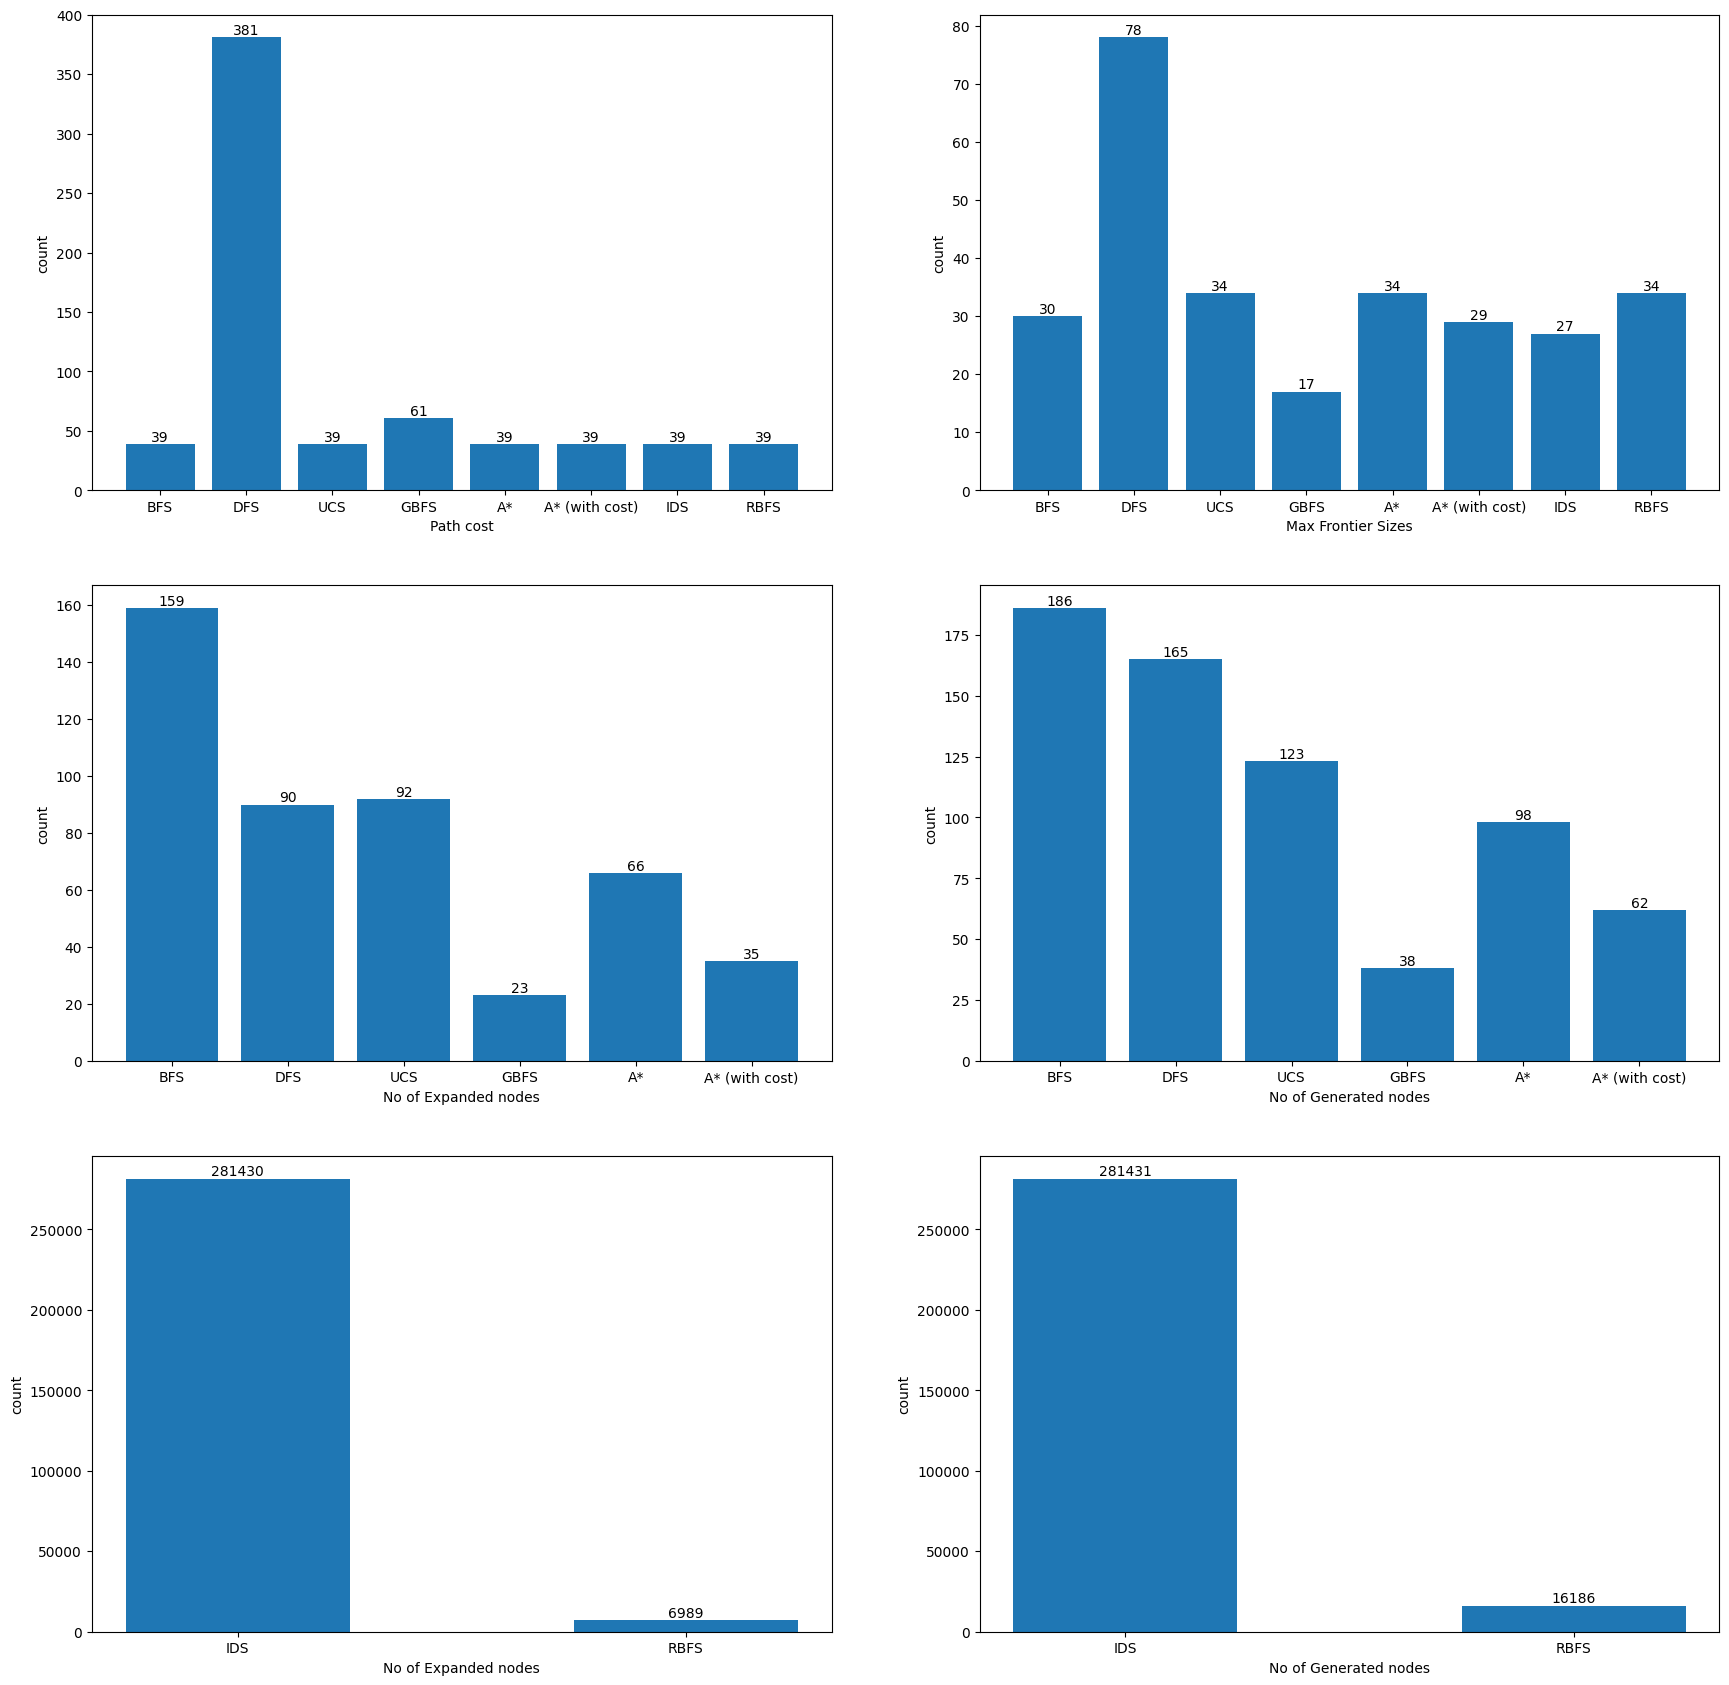

In [106]:
import matplotlib.pyplot as plt
def compare_search(
    Maze,
    algos=[
            breadth_first_search, 
            depth_first_search, 
            uniform_cost_search,
            greedy_best_first_search,
            astar_search,
            astar_search_with_cost,
            iterative_deepening_search,
            RBFS
        ],
    title = ['BFS', 'DFS',  'UCS', 'GBFS','A*', 'A* (with cost)', "IDS", "RBFS"],
    width = 0.8
        ):
    problems = []
    # path_found stores the path found by all algorithms in a list 
    path_found = []
    for algo in algos:
        problem = Maze()
        if algo is RBFS:
            problem = RBFS_Maze()
        problem.res = algo(problem)
        problem.total_path_cost = problem.res.path_cost
        # add the result path to path_found
        path_found.append(problem.print_path_found(problem.res))
        problems.append(problem)
    
    # print out pathes found by all algorithms
    for algo, result_path in zip(title, path_found):
        print(f"The path to goal state found by algorithm {algo} is : {result_path}")
    
    path_cost_array = {"title": "Path cost", "data": []}
    expanded_nodes_array = {"title": "No of Expanded nodes", "data": []}
    generated_nodes_array = {"title": "No of Generated nodes", "data": []}
    max_frontier_size_array= {"title": "Max Frontier Sizes", "data": []}
    for problem in problems:
        path_cost_array["data"].append(problem.total_path_cost)
        expanded_nodes_array["data"].append(problem.expanded_nodes)
        generated_nodes_array["data"].append(problem.generated_nodes)
        max_frontier_size_array["data"].append(problem.max_frontier_size)
    
    fig, ax = plt.subplots(3, 2, figsize=(21,21))
    
    # draw the path_cost, max_frontier_size of all algorithms in first row
    for index, item in enumerate([path_cost_array,max_frontier_size_array]):
        row = 0
        column = index
        x=title

        # giving the values against
        # each value at x axis
        y=item["data"]
        bars = ax[row,column].bar(x, y,width)
        ax[row, column].bar_label(bars)

        ax[row,column].set(xlabel=item["title"],ylabel="count")
    
    # draw the expanded nodes and generated nodes of all algorithms except RBFS and IDS in second row    
    for index, item in enumerate([expanded_nodes_array,generated_nodes_array]):
        row = 1
        column = index
        x=title[:-2]
        
        # giving the values against
        # each value at x axis
        y=item["data"][:-2]
        bars = ax[row,column].bar(x, y,width)
        ax[row, column].bar_label(bars)

        ax[row,column].set(xlabel=item["title"],ylabel="count")
    
    # draw the expanded nodes and generated nodes of RBFS and IDS in third row
    for index, item in enumerate([expanded_nodes_array,generated_nodes_array]):
        row = 2
        column = index
        x=title[-2:]
        
        # giving the values against
        # each value at x axis
        y=item["data"][-2:]
        bars = ax[row,column].bar(x, y,width=0.5)
        ax[row, column].bar_label(bars)

        ax[row,column].set(xlabel=item["title"],ylabel="count")
        
    plt.show()

compare_search(Maze)
# compare_search(Maze,[iterative_deepening_search,RBFS],["IDS","RBFS"],0.4)

### Analysis 

#### Number of nodes generated and expanded

Comparing the of nodes generated and expanded, IDS has the largest number. This is the effect of doing cycle checks in DLS as compared to DLGS (Depth Limited Graph Search) which stores reached notes, DLS is not able to eliminate redundant path and the Maze problem is a graph with countless of overlapping paths to a the to end goal. Just with one DLS, the IDS algorithm has visited the same state for multiple times and the redundancy of one state being visisted increases almost exponentially as the depth limit increases. This is because with the increase in depth, the possibility of a non-cycle path to the same state within the limit steps increases almost exponentially. So for IDS with cycle check, the actual nodes generated and expanded is $O(b^d)$. Moreover, it visits nodes generated and expanded in numbers close to its theoretical upper bound when compared to other algorithms.

The algorithm with second largest number of nodes generated and expanded is RBFS. Similarly, RBFS only does a cycle check without reached set and when all child has higher f than `f_limit`, it will rewind and later may re-genreate and re-expand the same node. Just as described in AIMA4e, every time RBFS "changes its mind", it could require many re-expansions of forgotten nodes. This property leads to the RBFS to be time inefficient. Regenerating and expanding the visited but forgotton nodes makes RBFS's number of generated and expanded nodes larger than the remaining algorithms.

For the remaining algorithms (BFS, DFS, UCS, GBFS, A*), the number of nodes generated and expanded are within a rather acceptable range. Among them, BFS generates and expands the most nodes, since it will exhaust one layer before move onto the next. The DFS generates nodes slightly less than BFS but more than UCS, however, expands nodes less than UCS. This is because DFS will go deep in a branch and ignore other generated nodes along the way until it traces back. While DFS finds the goal state in an early search, it has more nodes generated together with relatively less nodes expanded.

For UCS, since it's an uninformed search, with no help from heuristics, it will expand and generate nodes more than the group of informed search algorithms before it finally pops the goal state (in that our heuristics are all consistent).

The greedy best first search has the least number of nodes generated and expanded since it only aims at the goal state and ignores the path cost. It achieves such low number of nodes generated and expanded at the cost of non-optimality. Actually we will see in the next section that although GBFS has the least number of nodes generated and expanded, the path found by it is not optimal.

For A* search, since it's an informed search, in terms of the number of nodes generated and expanded, it outperforms the UCS. But since it considers the path-cost instead of only aiming at goal state, it expands and generates more nodes than GBFS.

#### Path-cost

Since in this specific Maze problem, the path with least cost happens to be the path with least steps (or rather the path with least cost in uniform cost setting). Because UCS, BFS and IDS are optimal when the action cost is uniform, they will find the path with least steps, which happens to be the path with least cost in this specific Maze problem. 

For A* search and RBFS, they are optimal as long as heuristics is admissible, so they are guaranteed to find the path with least cost since our heuristics are consistent.

For DFS and GBFS, they are not optimal. And in this problem, they indeed find path to goal state with larger path-cost. For GBFS, since it aims at the goal state, it finds path better than DFS which has no information of where goal state is.

#### Max frontier sizes

DFS has the largest max frontier size because it expands deep into a single branch until it finds the end node which requires storing more nodes in between. When DFS is going deep in the map, it leaves the nodes alongside with the path in the frontier and never pops them out until it traces back. So as the DFS finds the longest path to goal state, it also leaves the maximum number of nodes alongside the path inside the frontier.

GBFS has the least max frontier size, since it aims at goal and ignores nodes with low path-cost but somewhat higher h value unlike A*. So GBFS has the least max frontier sizes.

BFS, IDS, UCS, A* search and RBFS have max frontier sizes close to each other. Theoretically RBFS and IDS have max frontier size linear to the depth `d` and branching factor `b` while BFS has max frontier size exponential in depth. However, in this problem setting, the avaerage branching factor is small and with the help of reached set, BFS can prune its search tree's `b` to a lower level. And the depth is relatively shallow, so they have similar max frontier size to each other.

#### Summary

- BFS has largest time complexity among algorithms excluding IDS and RBFS. It can find the optimal path in uniform cost graph. Its space complexity increases exponentially with depth. However, since it will record the nodes visited in reached set, and the Maze problem itself has small branching factor and shallow goal state, its high space complexity doesn't reflect on the max frontier size.
- DFS saves time but lags serverely in path cost. Its max frontier size is also big since it goes deep in a detour path to goal state and leave all nodes along the way in the frontier.
- IDS performs the best in terms of path cost in uniform action cost setting but is heavily compensated by the huge number of nodes generated (which is the largest number of nodes generated and expanded among all algorithms). Although theoretically its complexity has the same order of BFS, in this Maze problem, the record of visited nodes gains a huge edge for BFS in time cost since after pruning the redundant path, the branching factor reduces quickly.
- UCS can find optimal path. But since it is uninformed search, it is defeated by A* search in almost all other facets.
- GBFS was able to reach the goal with even lower time and space complexity than A* search but was not able to find the optimal path.
- A* search was able to reach the goal with the lowest path cost and also lower time and space complexity with a better hueristic function.
- RBFS also has large time complexity (but better than IDS) in this problem setting, but can find the optimal path as long as heuristics is admissible. RBFS also has little space usage.

### Comparison of heuristics

As mentioned in section Q1.a, we have implemented two different heuristics:
1. Manhattan distance heuristics with uniform cost (`h` method in the code)
2. Manhattan distance heuristics with accurate cost (`h_with_cost` method in the code)


We have compared the two heuristics using A* search and the result shows that Manhattan distance heuristics with accurate cost outperforms the version with uniform cost in number of nodes generated, expanded, and max frontier size. They are able to find the optimal path since they are all consistent.

This result is not surprising as we had analyzed in section Q1.a, both of the two heuristics are consistent, and the Manhattan distance heuristics with accurate cost **dominates** the Manhattan distance heuristics with uniform cost. 

We could prove this easily:

> For every state $s$ with coordinates (x, y) in the maze graph, its Manhattan distance heuristics with uniform cost is $|11 - x| + |9 - y|$ and its Manhattan distance heuristics with accurate cost is $|11 - x| + |9 - y| \times 10$.
>
> It is obvious that $|11 - x| + |9 - y| \times 10 \geq |11 - x| + |9 - y|$ since |9 - y| is a non-negative number

Since the Manhattan distance heuristics with accurate cost **dominates** the Manhattan distance heuristics with uniform cost, the former one will expand lesser nodes than the latter, which leads to the results we have observed.



